In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# sklearn의 iris 데이터를 이용해 분류를 하는 과제입니다.
아래 코드는 iris 데이터를 분류해 iris_dataset에 저장하는 코드이므로 그대로 돌려주시면 됩니다.

In [2]:
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

from sklearn.datasets import load_iris
iris_dataset = load_iris()

### iris_dataset의 keys를 확인하시오. 

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다.
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.

- 힌트: X는 iris_dataset["data"], y는 iris_dataset["target"]

- random_state = 42

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(iris_dataset["data"],iris_dataset["target"], test_size=0.25, random_state=42)

### X_train의 크기와 y_train의 크기를 확인하시오.

In [7]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


### sklearn의 KNeighborsClassifier 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- n_neihbors=1
- 트레인 데이터 셋 : X_train, y_train

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [20]:
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [23]:
pred= knn.predict(X_new)
print("예측:{}".format(pred))
print("target_name:{}".format(iris_dataset['target_names'][pred]))

예측:[0]
target_name:['setosa']


### sklearn의 SVC 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- gamma="auto", random_state=42
- 트레인 데이터 셋 : X_train, y_train

In [25]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf',C=10,gamma=0.1,random_state=42)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1, random_state=42)

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [28]:
svm.predict(X_new)

array([0])

### decision_function()을 호출해 각 클래스의 점수 확인하고 위와 일치하는지 보기.

In [36]:
X_new_scores=svm.decision_function(X_new)
X_new_scores

array([[ 2.24148456,  1.01724067, -0.24284453]])

### np.armax()를 통해 최댓값의 인덱스 확인하기.

In [38]:
np.argmax(X_new_scores)

0

### SVC 기반으로 OvR 전략 사용하는 다중 분류 모델을 만들고, 트레인 데이터 셋을 fit 시키시오.
- from sklearn.multiclass import OneVsRestClassifier
- 옵션: SVC(gamma="auto", random_state=42)
- 트레인 데이터 셋 : X_train, y_train

In [39]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf=OneVsRestClassifier(SVC(gamma="auto",random_state=42))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

### X_new를 예측하시오
- X_new = np.array([[5, 2.9, 1, 0.2]]) 

In [40]:
ovr_clf.predict(X_new)

array([0])

### 아래는 랜덤 포레스트 분류기 생성 코드입니다. 그냥 돌려주세요!

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf =RandomForestClassifier(random_state=1)


### cross_val_score로 rf 모델의 score list를 생성하고 프린트 하시오.
- cv=5 설정
- 트레인 데이터 셋 : X_train, y_train

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf= RandomForestClassifier()
score_list=cross_val_score(rf, X_train, y_train, cv=5)
print(score_list)

[0.95652174 0.95652174 0.81818182 1.         0.95454545]


### corss_val_predict 함수로 예측을 하시오.
- from sklearn.model_selection import cross_val_predict

In [46]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(rf, X_train, y_train, cv=5)

### y_train과 y_train_pred의 confusion_matrix를 출력하시오.

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[35,  0,  0],
       [ 0, 35,  4],
       [ 0,  3, 35]], dtype=int64)

### y_train과 y_train_pred의 정밀도와 재현율을 출력하시오. 
- 각각 average='micro'설정

In [54]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred,average='micro' )

0.9375

In [58]:
recall_score(y_train, y_train_pred, average='micro')

0.9375

# titanic.csv를 이용한 분류도 진행해 보겠습니다. 

In [58]:
# 타이타닉 파일 읽어오기
import pandas as pd
import numpy as np
titanic=pd.read_csv("titanic.csv")


### train 데이터의 head()를 살펴보시오.

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 필요없는 변수를 제거하시오. ("PassengerID", "Name", "Ticket","Cabin")

In [60]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

### Nan 값이 있는 행을 삭제하시오.

In [62]:
titanic.dropna(axis=0, inplace=True)

### 명목변수에 대한 encoding을 하시오. 

In [63]:
titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

titanic = pd.get_dummies(titanic, columns=['Embarked'])

titanic = pd.get_dummies(titanic, columns=['Pclass'])


In [64]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


### 타이타닉 데이터의 종속변수를 분리해, X_titanic과 y_titanic으로 저장하시오

In [65]:
X_titanic=titanic.drop(labels='Survived',axis=1).values
y_titanic=titanic['Survived'].values

### train_test_split를 사용하여 지난 과제와 동일한 기준으로 train 셋과 test 셋을 분리해보겠습니다. 
- testset 의 size : 전체 데이터 셋의 25%

- 각 set의 이름 : X_train, X_test, y_train, y_test로 한다.
- random_state = 42

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_titanic, y_titanic, test_size=0.25, random_state=42)

### StandardSclaer를 사용해서 데이터의 정규화 하시오.
- 정규화 대상 : X_train, X_test

- X_train은 fit_transform()을 X_test는 transform() 을 사용하시오.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### sklearn.linear_model의 LogisticRegression으로 모델 생성하시오.

In [88]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

train세트 (X_train, y_train)의 정확도 구하기

In [95]:
from sklearn.metrics import accuracy_score
model_prediction = model.predict(X_train)
accuracy_score(y_train, model_prediction)

0.8052434456928839

### test세트 (X_test, y_test)의 정확도를 구하시오.

In [97]:
model_pred=model.predict(X_test)
accuracy_score(y_test, model_pred)

0.7752808988764045

###  cross_val_predict 로 y 예측값을 구한후, 오차 행렬 생성하시오.
- cv=3

In [108]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(model,X_train,y_train,cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[273,  52],
       [ 58, 151]], dtype=int64)

### ROC 곡선을 그리시오.

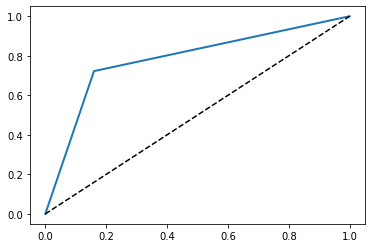

In [111]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds=roc_curve(y_train,y_train_pred) #뭔가 잘못된 것 같은데,,, 잘모르겠습니다ㅠㅠ#

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()